# 赛题理解

## 学习目标 

## 数据概况 

In [10]:
import numpy as np
import pandas as pd
import matplotlib as plt
import datetime
import re
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [11]:
# 解决现实不出中文的问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 设置图形大小
plt.rcParams['figure.figsize'] = (16, 4)
#设置标题标注和字体大小
plt.rcParams.update({"font.size":20})#此处必须添加此句代码方可改变标题字体大小

In [12]:
train = pd.read_csv('train.csv')
testA = pd.read_csv('testA.csv')

In [13]:
print('Train data shape:',train.shape)
print('TestA data shape:',testA.shape)

Train data shape: (800000, 47)
TestA data shape: (200000, 48)


In [9]:
#设置chunksize参数，来控制每次迭代数据的大小
chunker = pd.read_csv("./train.csv",chunksize=5)
for item in chunker:
    print(type(item))
    #<class 'pandas.core.frame.DataFrame'>
    print(len(item))
    #5

<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
5


KeyboardInterrupt: 

In [14]:
train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [15]:
train.head(3).append(train.tail(3))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


In [16]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

There are 22 columns in train dataset with missing values.


In [17]:
have_null_fea_dict = (train.isnull().sum()/len(train)).to_dict()
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value

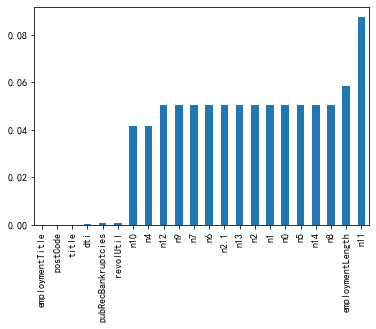

In [19]:
# nan可视化
missing = train.isnull().sum()/len(train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

## 预测指标

# 数据分析(EDA)

# 特征工程

# 训练模型